**Problem Statement:**
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent

In [20]:
import pandas as pd
import numpy as np


In [21]:
comp_data = pd.read_csv("/content/Company_Data.csv")
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [22]:
comp_data.shape

(400, 11)

found the character data into data set so data have to convert this into numerical form

In [23]:
#ShelveLoc,urban,us
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
 
le = preprocessing.LabelEncoder()
#Converting A charecter labels into numercial form
 


In [24]:
comp_data["ShelveLoc"]=le.fit_transform(comp_data["ShelveLoc"])
comp_data["Urban"]=le.fit_transform(comp_data["Urban"])
comp_data["US"]=le.fit_transform(comp_data["US"])

In [25]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [26]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [27]:
comp_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [28]:
comp_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [29]:
comp_data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


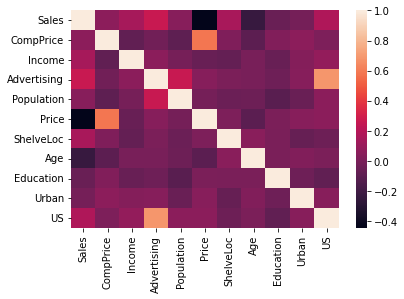

In [30]:
import seaborn as sns
sns.heatmap(comp_data.corr())

In [31]:
comp_data=comp_data.assign(Sale=pd.cut(comp_data['Sales'], 
                               bins=[ 0, 4, 9,15], 
                               labels=['Low', 'Medium', 'High']))
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium


(-1.1144279074565924,
 1.1006870432122187,
 -1.1117615010973978,
 1.1112370820653896)

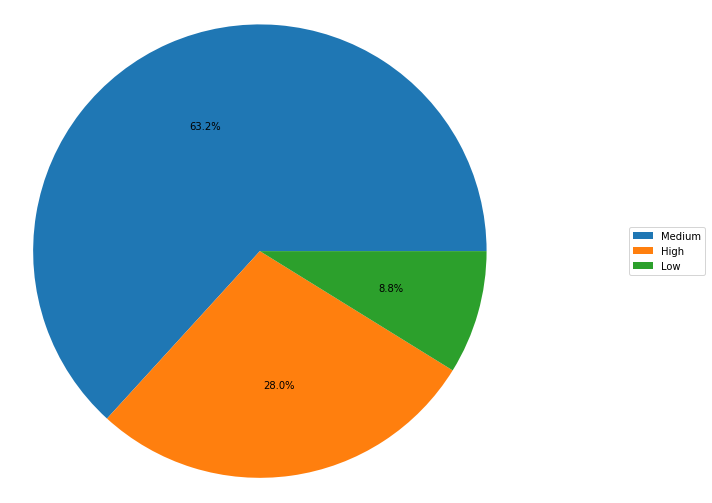

In [32]:
#Basic pie chart to view distribution of apps across various categories
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = comp_data["Sale"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

In [33]:
target = pd.DataFrame.astype(comp_data['Sale'], dtype="object")
comp_data_new = comp_data.copy()
comp_data_new = comp_data_new.drop('Sale', axis =1)

In [34]:
x=comp_data_new

In [35]:
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [36]:
x.drop(labels=['Sales'],axis=1,inplace=True)

In [37]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [38]:
target = target.fillna('').apply(str)
target

0        High
1        High
2        High
3      Medium
4      Medium
        ...  
395      High
396    Medium
397    Medium
398    Medium
399      High
Name: Sale, Length: 400, dtype: object

In [39]:
#label encoding
y = le.fit_transform(target)
y

array([1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3,
       3, 3, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 2, 1, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 0, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 2, 3, 3, 1, 1,
       1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 2, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1, 3,

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[ 0.0302219 ,  0.69247946,  0.35919841, -0.24146921,  0.85731782,
        -0.37288521,  1.18595525, -1.52591136,  0.6644106 ,  0.76430257],
       [ 0.42495695,  1.56104753,  0.95708392, -1.60381167, -1.53048687,
        -1.56611789,  0.93896164,  1.57435299,  0.6644106 ,  0.76430257],
       [-1.74608582,  1.88676055, -0.986044  ,  0.0049847 , -0.97617507,
         0.82034747,  1.18595525, -1.52591136, -1.50509339, -1.30838236],
       [ 0.35916778, -1.44275037, -0.08921573,  0.97710846,  0.72939972,
        -1.56611789,  1.18595525,  0.7992869 ,  0.6644106 ,  0.76430257],
       [-0.29872397, -0.42942096,  2.00338357, -0.00870718, -1.10409317,
        -1.56611789,  1.55644566,  1.57435299,  0.6644106 ,  0.76430257],
       [-0.16714562,  1.2353345 ,  1.85391219,  1.38101904,  0.30300602,
        -1.56611789, -1.46922604, -0.36331223,  0.6644106 ,  0.76430257],
       [-1.74608582,  0.14962442, -0.986044  , -1.42581718, -1.99951993,
         0.82034747,  0.75371643,  0.7992869 

In [42]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([2.2 , 2.35, 2.55, 2.55, 2.3 , 2.  , 1.2 , 2.85, 2.7 , 2.85, 2.85,
       2.4 , 2.6 , 1.1 , 2.65, 2.95, 1.65, 2.6 , 1.95, 2.6 , 2.7 , 2.9 ,
       2.9 , 2.  , 2.6 , 1.35, 2.8 , 2.3 , 1.85, 2.8 , 2.5 , 1.9 , 2.5 ,
       2.05, 2.9 , 1.1 , 3.  , 2.55, 2.75, 2.55, 2.6 , 1.85, 3.  , 1.3 ,
       2.6 , 2.35, 2.7 , 2.5 , 2.  , 1.5 , 2.5 , 3.  , 2.  , 1.5 , 2.45,
       1.95, 2.1 , 1.9 , 2.45, 2.6 , 2.6 , 1.35, 2.75, 2.85, 1.9 , 2.4 ,
       1.8 , 2.2 , 2.1 , 2.2 , 2.  , 2.  , 1.9 , 2.6 , 2.8 , 2.  , 2.8 ,
       1.85, 2.3 , 1.65])

In [43]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6737500000000001
Mean Squared Error: 0.6715625
Root Mean Squared Error: 0.8194891701541882


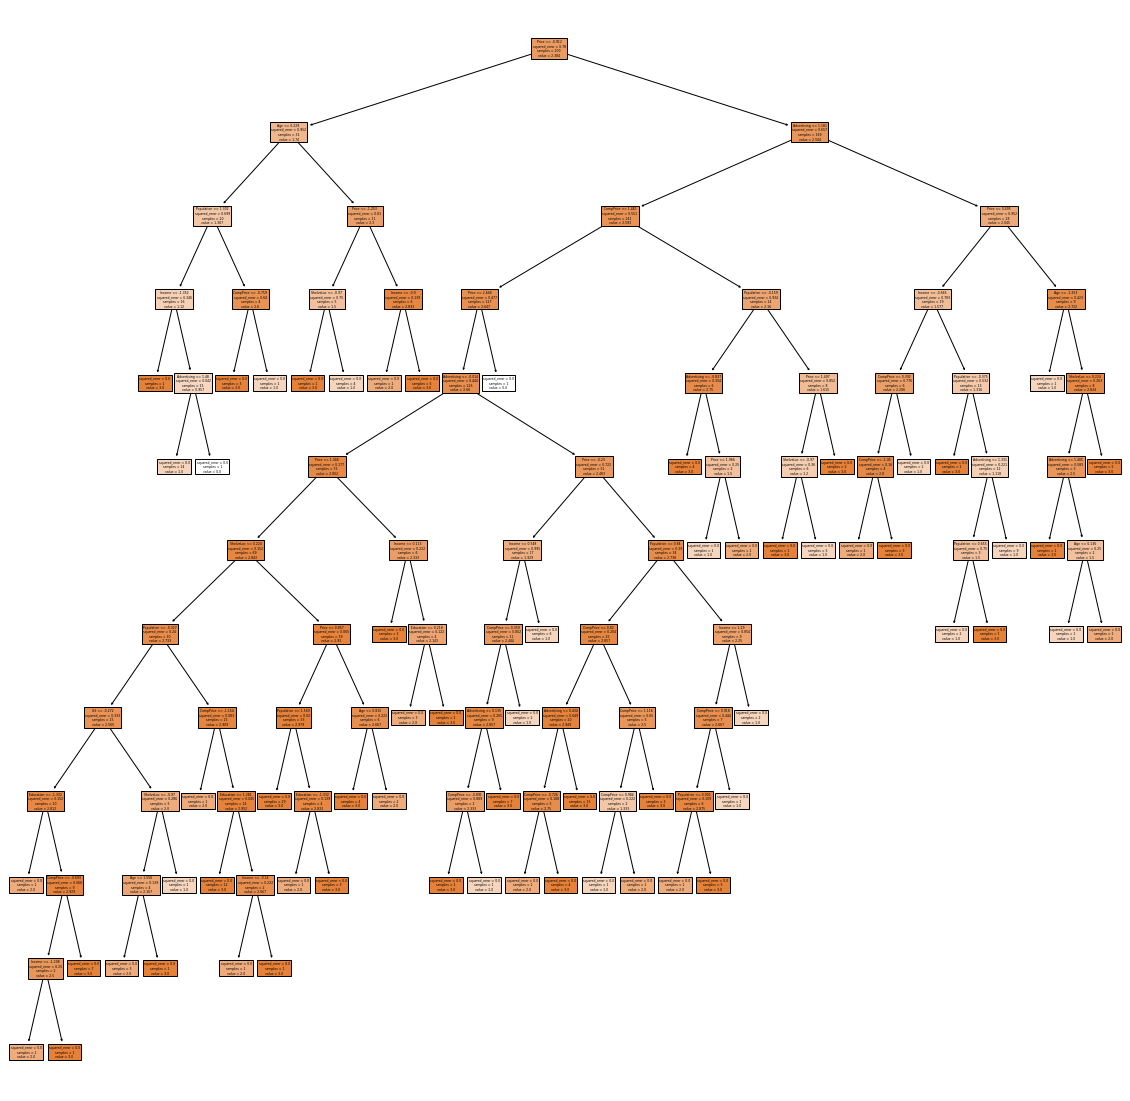

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor.estimators_[0], feature_names=x.columns, filled=True)

In [45]:
# Random Forests in `scikit-learn` (with N = 100)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

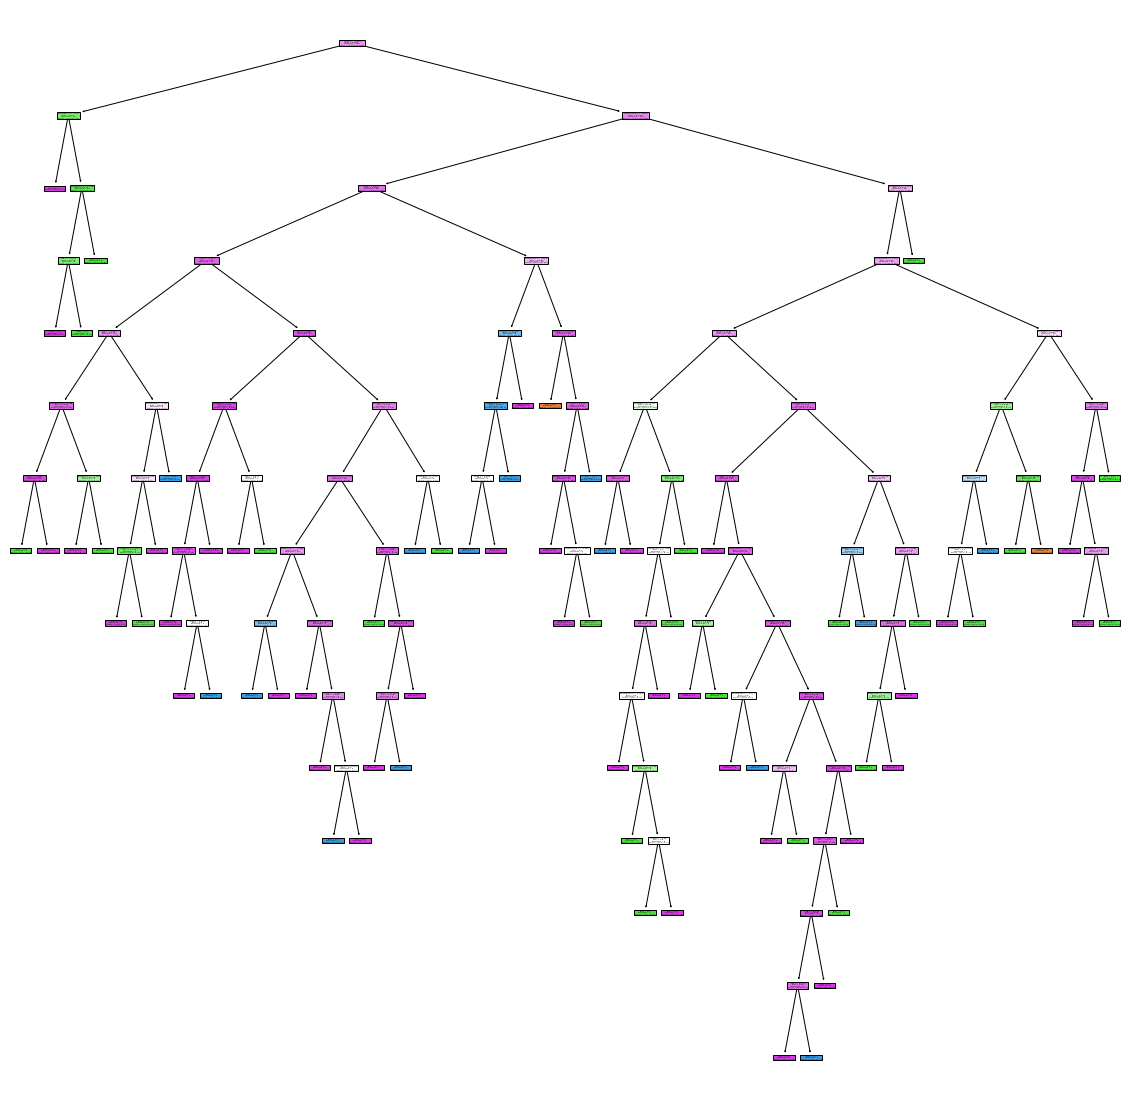

In [46]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=x.columns, filled=True)

RandomForestClassifier

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_trees = 100
max_features = 4
kfold = KFold(n_splits=20 ,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print("The Accuracy Score of Randomforestclassifier",results.mean()*100)

The Accuracy Score of Randomforestclassifier 74.75


In [48]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=4)

In [49]:
pred1 = model.predict(X_test)
pred1

array([3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1])

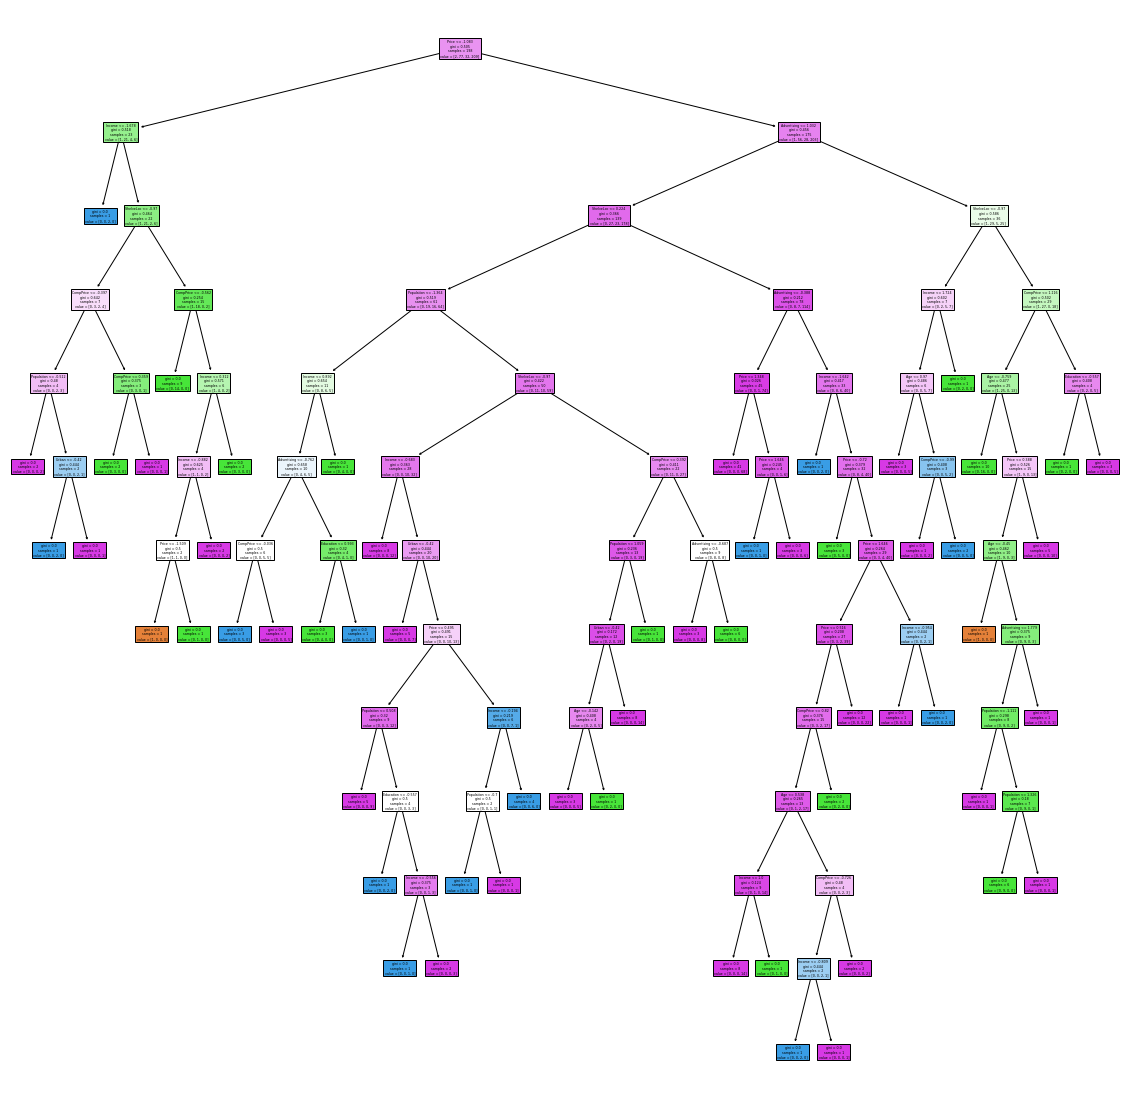

In [50]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True)

other ensemble techniques

Bagging

In [51]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = KFold(n_splits=20, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results_bag = cross_val_score(model1, x, y, cv=kfold)
print("The Accuracy Score of bagging",results_bag.mean()*100)

The Accuracy Score of bagging 74.0


Boosting

In [52]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10
seed=7
kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_boost = cross_val_score(model2, x, y, cv=kfold)
print("The accuracy score of Adaboosting",results_boost.mean()*100)

The accuracy score of Adaboosting 62.25000000000001


#Stacking Ensemble for Classification
ensemble model 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [54]:
kfold = KFold(n_splits=10, random_state=10,shuffle=True)

In [55]:
#Different models initialised
log_clf_1 = LogisticRegression(random_state=0)
log_clf_2 = LogisticRegression(random_state=42)
decision_clf1 = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
decision_clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state=42)


#Creation of list of models
Model_List=[('Logistic Regression 1', log_clf_1),
            ('Logistic Regression 2', log_clf_2),
            ('Decision Tree 1', decision_clf1),
            ('Decision Tree 2', decision_clf2)]

In [57]:
#Splitting into train and test dataset
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)


#Initialising hard voting model
from sklearn.ensemble import VotingClassifier
voting_clf_hard = VotingClassifier(estimators = Model_List,
                                   voting = 'hard')

#Fitting the data
voting_clf_hard.fit(X_train, y_train)

#Scoring the model for test
hard_voting_score=voting_clf_hard.score(X_test,y_test)
print("Hard Voting Test Accuracy:%.2f"%hard_voting_score)

#Initialising soft voting model
voting_clf_soft = VotingClassifier(estimators = Model_List,voting = 'soft')


#Fitting the data
voting_clf_soft.fit(X_train, y_train)

#Scoring the model for test
soft_voting_score= voting_clf_soft.score(X_test,y_test)
print("Soft Voting Test Accuracy: %.2f"%soft_voting_score)

Hard Voting Test Accuracy:0.65
Soft Voting Test Accuracy: 0.62


#RandomForestRegressor Visualize

In [58]:
y1=pd.DataFrame(y_pred.copy(), columns=['sale_pred'])
comp_data_new= pd.concat([comp_data.copy(),y1], axis=1)
comp_data_new .head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale,sale_pred
0,9.50,138,73,11,276,120,0,42,17,1,1,High,2.20
1,11.22,111,48,16,260,83,1,65,10,1,1,High,2.35
2,10.06,113,35,10,269,80,2,59,12,1,1,High,2.55
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium,2.55
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium,2.30


In [59]:
# using random forest regression model
comp_data_new=comp_data_new.assign(Sale_pr=pd.cut(comp_data_new['sale_pred'],bins=[0,1,2,3],labels=['Low', 'Medium', 'High']))

(-1.1033932043271177,
 1.1001616160262648,
 -1.1035450131326399,
 1.1019121335980906)

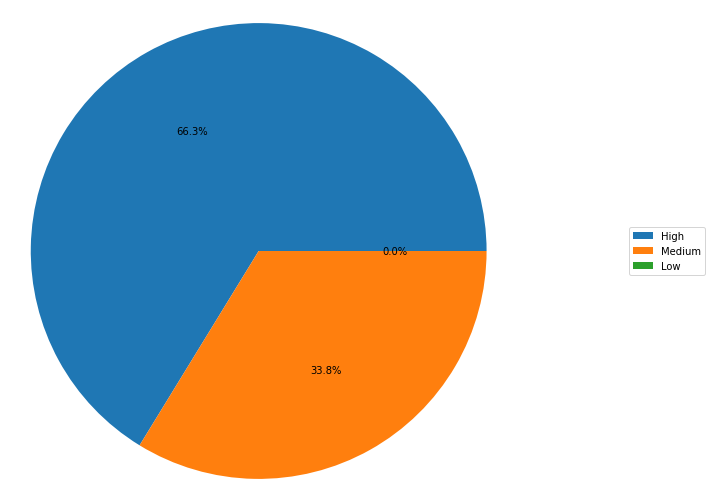

In [60]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = comp_data_new["Sale_pr"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

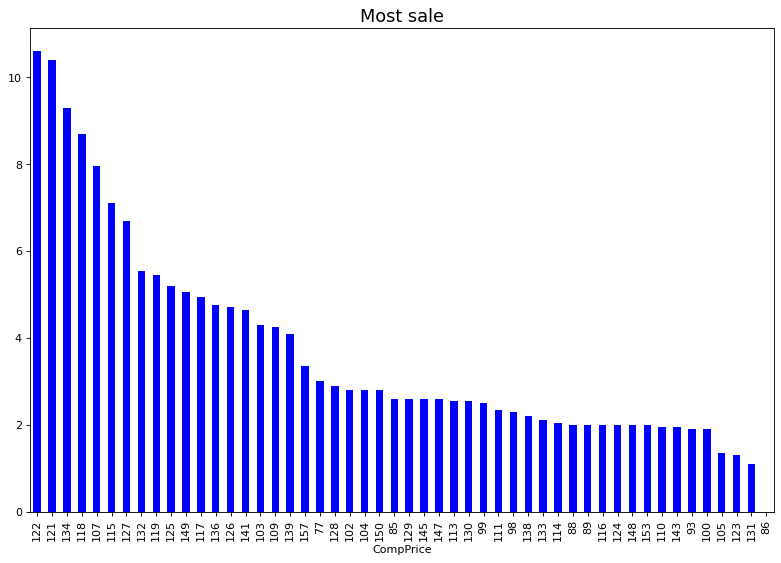

In [62]:
#Bar Graph For Company price and Sale prediction
compprice=comp_data_new.groupby("CompPrice")["sale_pred"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
compprice.plot.bar(color="blue")
plt.title("Most sale",fontsize=16)
plt.show()

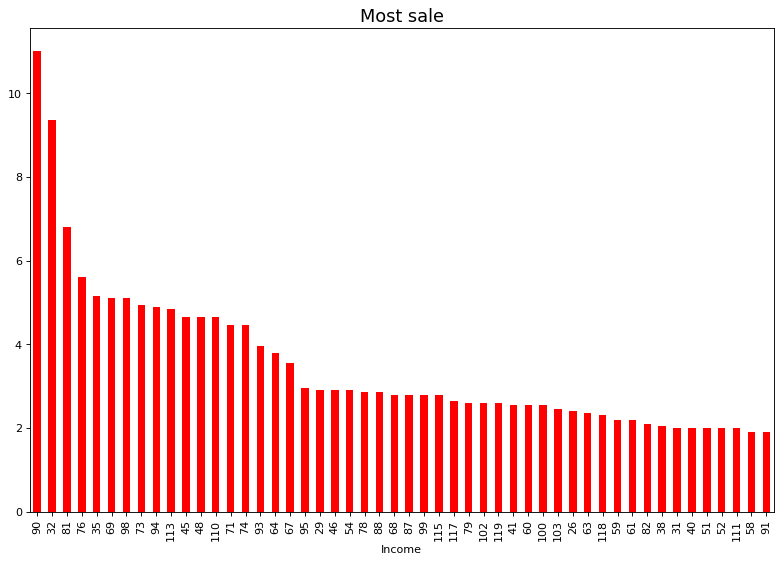

In [63]:
#Bar Graph For Income and Sale prediction
Income=comp_data_new.groupby("Income")["sale_pred"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
Income.plot.bar(color="red")
plt.title("Most sale",fontsize=16)
plt.show()

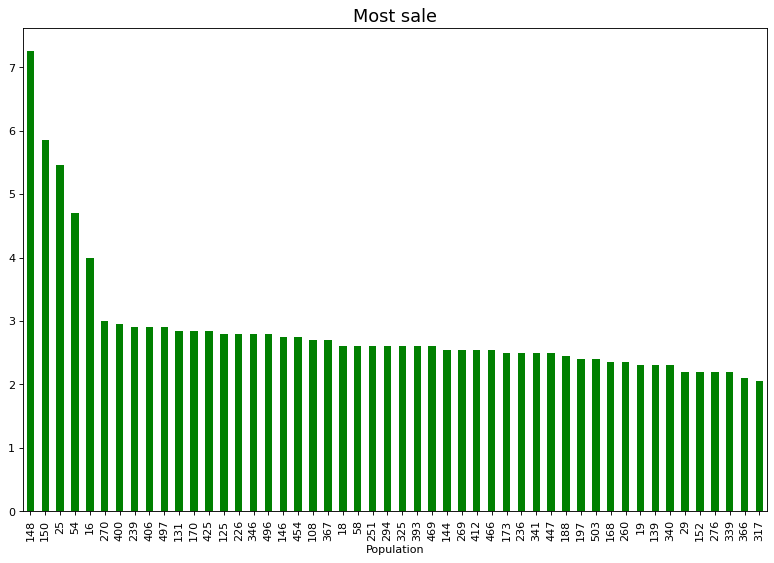

In [64]:
#Bar Graph For Population and Sale prediction
Population=comp_data_new.groupby("Population")["sale_pred"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
Population.plot.bar(color="green")
plt.title("Most sale",fontsize=16)
plt.show()

**Conclusion**       
Found 
Mean Absolute Error: 0.6737500000000001,
Mean Squared Error: 0.6715625,
Root Mean Squared Error: 0.8194891701541882                                                           The Accuracy Score of Randomforestclassifier 72.5                          
The Accuracy Score of bagging 74.0                                         
The accuracy score of Adaboosting 62.25000000000001                        
the Bagging give us a high accuracy ie 74
